In [10]:
import time

# data processing library
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from functools import reduce
import collections

# data visualization library  
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")


In [11]:
#!pip install pandas-profiling


# Background

Boehringer Ingelheim has been working on a multi channel customer engagement approach as part of their strategy. 

As such, email communication has been identified as a viable channel in which to communicate with physicians.

As customer centricity is a focus for BI, the online communication should be tailored to the physician‘s preferences and requirements.

BI has been working with physicians to obtain their consent to receiving communication from the company via email. 

This is mainly done by having the customer facing team ask the physician for their consent during face to face visits.

The Brand Team has created compliance approved promotional materials for online communcation. 

A campaign cycle has been completed using a mix of face to face and email communication and data has been collected to look at the email activity of physicians.


# Task

In the data provided to you, there is record of the email communication sent to physicians who have opted in. 

As email communication is regulated by law, BI can only contact physicians via this channel if an opt in is available.

You will also find the categorization of email addresses of customers in private practice or in a clinic, which indicates the preferred email address of the physician with which they would like BI to use.

Based on the needs of the Brand Team, analyze the data and prepare a management presentation to provide recommendations for optimizing the email communication approach including recommendations on how to measure the success of subsequent email campaigns.

Your presentation should be no longer than 15 minutes. The audience will be a mixed group of brand team members including analysts.

You are welcome to use any presentation medium.



# Fundamentals

## Healthcare in Germany



https://transferwise.com/gb/blog/healthcare-system-in-germany

https://www.howtogermany.com/pages/doctors.html

https://www.expatica.com/de/healthcare/healthcare-services/german-hospitals-1090587/

https://the-red-relocators.com/relocation-guides-germany/healthcare-in-germany/#hospitals

https://www.howtogermany.com/pages/top-6-german-healthcare.html

https://www.expatica.com/de/healthcare/healthcare-basics/german-healthcare-system-103359/#pharmacies


As many German doctors work in both their private practices and hospitals, you may be treated by your usual GP in the hospital depending on availability and area of speciality. If your GP is unable to treat you, they will refer you to a recommended surgeon.

- Drugs costs

The pharmaceutical industry plays a major role in Germany within and beyond direct health care. Expenditure on pharmaceutical drugs is almost half of those for the entire hospital sector. Pharmaceutical drug expenditure grew by an annual average of 4.1% between 2004 and 2010. Such developments caused numerous health care reforms since the 1980s. An actual example of 2010 and 2011: First time since 2004 the drug expenditure fell from 30.2 billion Euro in 2010 to 29.1 billion Euro in 2011, i. e. minus 1.1 billion Euro or minus 3.6%. That was caused by restructuring the Social Security Code: manufacturer discount 16% instead of 6%, price moratorium, increasing discount contracts, increasing discount by wholesale trade and pharmacies.[52]

As of 2010, Germany has used reference pricing and incorporates cost sharing to charge patients more when a drug is newer and more effective than generic drugs.[53] However, as of 2013 total out-of-costs for medications are capped at 2% of income, and 1% of income for people with chronic diseases.[54]


- Hospitals

The average length of hospital stay in Germany has decreased in recent[when?] years from 14 days to 9 days, still considerably longer than average stays in the United States (5 to 6 days).[57][58] Part of the difference is that the chief consideration for hospital reimbursement is the number of hospital days as opposed to procedures or diagnosis.[citation needed] Drug costs have increased substantially, rising nearly 60% from 1991 through 2005. Despite attempts to contain costs, overall health care expenditures rose to 10.7% of GDP in 2005, comparable to other western European nations, but substantially less than that spent in the U.S. (nearly 16% of GDP).[59]

In 2017 the BBC reported that compared with the United Kingdom the Caesarean rate, the use of MRI for diagnosis and the length of hospital stay are all higher in Germany.[60]


- PHYSICIANS & HOSPITALS

All in all the distribution of physicians or hospitals is good all over Germany, however, you'll find the biggest population of both in the big cities.

Find an English speaking physician in your neighborhood.


- Physicians

About 350.000 physicians are practicing in Germany resulting in a proportion of around 3.4 per 1,000 inhabitants. The ratio, however, differs significantly between countryside and urban centers.

A physician running a practice needs to register with the Statutory Health Insurance Physicians (SHI - Kassenärztliche Vereinigung) unless he decides to take on private patients only. This institution has developed an enormous catalog of all possible medical services and assigned a value for each. Based on this catalog the physician invoices to the SHI directly. This also allows to analyze big data and recalculate the values per services. The physician can and will always try to attract private patients, too, because a similar catalog has been developed for private services - basically the same, but with higher value.


- Hospitals

Hospitals in Germany are grouped into three main types:

Public hospitals (Öffentliche Krankenhäuser) are run by local state authorities, towns and the states
Voluntary, non-profit making hospitals (Freie gemeinnützige Krankenhäuser) run by churches or non-profit organizations, such as the German Red Cross
Private hospitals (Privatkrankenhäuser) run as free commercial enterprises
All of them have a very good reputation and are considered being amongst the world's best hospitals. They are modern and use the latest technology and provide high-quality medical care. See here to find a ranking of German hospitals.

Most hospitals cover a range of treatments, but not all. Once you have chosen your new home address, you may spend some time to review the scope of treatment offered by the two closest hospitals.  If you need special treatment, your physician will recommend a hospital, but you are not bound to follow it. You may check here for the hospitals offering your demanded treatment.

While English-speaking nurses are rare, most doctors do speak good English.

Cost of Treatment
If you are regularly insured in Germany the cost of hospital treatment in public hospitals (on referral by a doctor, or in emergencies) is covered by the public health authorities, except for a small daily charge from the start of hospital treatment up to a maximum of 14 days.

Private insurance is recommended for specialist medical treatment outside the German National Health Service, which can be expensive.

In case you are not regularly insured in Germany but are an EU citizen, the current rules for the coordination of social security-systems in Europa stipulate, that the German physician or hospital bills the treatment-costs for emergency cases to the respective foreign health insurance of the treated patient.

German specifics of hospital treatments
Patients are usually put into 3-bedrooms with no separation between the beds. You may buy additional private insurance to cover for a single room, but that may still not always be granted if the hospital has problems with its bed capacity at that specific point in time. Usually, it is possible. You can also book a "family room" in case you need to accompany your child, or your wife giving birth. Again, this depends on the availability of beds.

Every morning, doctors will do their visits and decide whether you are ready to go home or stay a day longer. Usually, you won't be released on a Sunday.

You will be given hospital gowns in case you have an operation and need to be treated with infusion or the like. Once you feel better, you may ask the nurses, whether you can put on your own clothes. The check-ups sometimes require your undressing, and it is expected that you just do as told. There will be no cover for parts of the body that don't need inspection, however, usually, your stripping down is limited to those that need examination. The hospital gowns are open on the back, and it can be very embarrassing to ie., use the toilet and be spotted by your co-patient. So bring a gown or pyjama and have it put in easy reach. Also to bring: towels, slippers, soap, toilet articles, and a washcloth.

Meals and mealtimes at hospitals conform to what's usual in Germany: breakfast and dinner will be bread, lunch some hot meal. You can often choose out of two options. And in some cases, there may be patient fridges, and you can bring your own food and put it there (if labeled).


- The Top 6 Things You Should Know About German Hospitals, Doctors and Healthcare

Whether you are foreigner living in Germany with a visa or residence permit or a medical tourist who will be visiting Germany specifically for care and treatment, the German healthcare system may not be what you are used to. But, with careful planning and informed expectations, it can be an extremely positive experience. Many patients are able to get a better quality of medical treatment than they could have in their home country, and can often save money doing so.

- 1) Patients can expect to receive high quality care wherever they go in Germany

There are several cultural differences between the German and other health care models that patients should be aware of before treatment. Doing thorough research and knowing what to expect before you see a doctor or enter a hospital can prevent surprises and allow for a worry-free, low-stress experience.

- 2) German hospitals put quality medical treatment above all else

German hospitals are focused on giving patients the best quality of medical care and not on providing them the most luxurious hospital experience. Because of this, sometimes the level of privacy and comfort is not what patients are used to. However, many hospitals offer additional options for privately insured patients who want a higher level of comfort than the standard offer at German hospitals.

- 3) German doctors are very honest

Germany has very strict laws when it comes to anti-corruption and honesty in the healthcare system. Patients in Germany for medical treatment can be sure they will be treated with honesty, transparency and respect. However, this also means that doctors will always tell patients the truth, even in cases of a bad prognosis. Sometimes, if a patient is traveling with their family, the family may want to keep the severity of their family member's illness a secret from them, so they don't have to worry. A German doctor, however, will not hide information from a patient about their own health. If the family is seriously worried about how the patient will react to hearing bad news about their diagnosis, this must be discussed with the doctor beforehand. In normal circumstances German doctors tell patients the truth.

- 4) German doctors will ask a lot of questions

In order to provide the best treatment, German doctors need a lot of information from the patient. They will ask detailed questions about the patient's medical history and diagnosis in their home country, and it is important that they receive up-to-date medical documents and reports. Additionally, if the patient's condition changes, they expect to be informed quickly, because this may affect the treatment recommendations.

- 5) German doctors will provide the patient with a lot of information

In Germany, doctors are legally required to explain to patients extensively about the treatment they will be receiving. The patient needs to sign a consent form before undergoing treatment, and they will have the opportunity to ask questions, which German doctors will answer in great detail. For some patients, this can feel overwhelming.

- 6) German hospitals are all about efficiency

Germany is famous for doing things with efficiency, and the healthcare system is no different. In Germany, the goal of the hospital is to provide patients timely and effective treatment so they return home as quickly as possible. This approach can actually save patients money, because by spending less time in the hospital they wind up paying less overall.



- The German healthcare system: a guide to healthcare in Germany



## Email Consent under GDPR

https://www.litmus.com/blog/5-things-you-must-know-about-email-consent-under-gdpr/

https://www.litmus.com/blog/remember-when-they-said-gdpr-would-kill-email-it-didnt/


https://www.isico-datenschutz.de/en/healthcare-data-protection/



- Background: Regulations on health care within the GDPR

The GDPR does not explicitly regulate the health system. Originally, there was the intention for an Article 81 “Processing of personal data for health purposes”, but it was dropped after the discussions on the latest version. Nevertheless, the GDPR contains provisions that specifically relate to health data and thus have a significant impact on digitisation within the healthcare sector.

Data processing, i.e. the processing of personal data, is generally prohibited under the GDPR, but allowed in accordance with Article 6 (1) lit. a), for example, if the person affected consents to the processing. Furthermore, in addition to other permission reasons, data processing is even permissible if a balancing of interests turns out to be in favour of data processing (such as a company’s interests). For health data, however, Article 9 GDPR provides for special regulations. Health data is considered particularly worthy of protection under Article 9 because it is particularly sensitive. Due to the sensitivity of the data, their processing is therefore only permissible in accordance with the strict requirements of Article 9 (2) GDPR in conjunction with Article 6 GDPR.

- Health Apps

An important use case in the processing of health data in the field of digitisation are health apps, such as heart rate monitors or sports trackers. Firstly, Article 9 (2) lit. (a) GDPR enables the processing of personal data via consent of the data subject. It is important to pay attention to the extensive information and transparency obligations of the GDPR. The affected person must know at all times what happens to his data. Without his permission, health data may not be disclosed to third parties (such as insurance companies).

Article 9 (2) GDPR contains a large number of other permissive rules that health apps can be taken hold of. An example is the protection of vital interests if the person affected is no longer able to give consent (for example, if the person affected is located having a heart attack reported by an app). However, for this permissive rule to apply, there must be an actual and specific case concerning a vital interest. That means, that the permanent tracking of data that (eventually) can also affect a vital interest is therefore not allowed. Likewise, the prior obvious publication of data by the data subject (such as posting a lower resting pulse as a result of regular training) constitutes a permissive rule.

In addition, the protection of individual and public health is considered as a legal basis. Where the individual health requires to treat certain illnesses and symptoms of the person affected professionally, this may also require falling back on the data needed from the app. Public health mainly covers cases of spreading health threats, such as epidemics, of which the spreading can be tracked by an app. The justification standards of individual and public health for the operation of health apps lead to the related question of the admissibility of the electronic medical record under the GDPR. In any case, there is sufficient legitimacy for the apps on the basis of the GDPR, so that the loosening of German national data protection regulations does not seem necessary in this respect.


- The Electronic Medical Record

Both Article 9 (2) lit. (h) (individual health) and Article 9 (2) lit. (i) (public health) enable Member States to determine when the processing of health data for these two purposes is necessary. Thus, there are so-called opening clauses giving Member States great flexibility to adopt their own national regulations without violating the GDPR. In this context, corresponding provisions in the German Social Security Code V (SGB V) could be introduced, which not only allow an electronic patient record having the format of a health card, but also of an app on the smartphone. Although the opening clauses of the GDPR and SGB V thus make it possible to introduce the electronic patient file, their respective use in individual cases must always be dependent on the respectively given consent of the patient (or the other permission norms of Article 9 (2) GDPR). If German State Minister for Digitisation Bär in this regard has spoken of a relaxation of standards for data protection to introduce and use the electronic medical record, there are considerable doubts whether the use of the patient record would be compatible with the GDPR without the consent of the patient and outside the provisions of Article 9 (2) GDPR.

The current proposal for reform on Article 305 (1) SGB V expressly stipulates such a need for consent to use the electronic patient record. However, it remains uncertain whether under the proposed version of Article 305 (1) SGB V “providers of electronic medical records” would not be able to undermine the consent requirement, since the current wording of the reform proposal enables such an exemption by allowing easier access for such providers. This probably represents a violation of the consent requirement of the GDPR.


- Big Data

Big Data analyses of health data happen in different applications. For example, such analyses can also prevent the spreading of diseases and optimise the need-based supply of medicines and medical devices. For both reasons, therefore, they may be founded upon Article 9 (2) lit. (i) GDPR (protection of public health and ensuring the quality of medicinal products and medical devices). However, the data subject rights, such as the right of revocation – which is mostly difficult to implement in respect of big data analyses – must always be considered. In order to meet these challenges, the principles of pseudonymisation and anonymisation must be taken into account. This also applies in the event, that the Member States decide to use the opening clauses – which are also available in this context.

- Conclusion and Recommendation for Action

Upon evaluation to the GDPR, health data represent data, which is particularly sensitive and therefore particularly worthy of protection. Regardless of whether these data are processed on the basis of national law or based on the GDPR, one must always ensure a legal basis for their processing. If the legal requirements are met in each individual case and their conformity with GDPR has also been checked, the processing of health data in new digital applications will be admissible.


- How are my medical data protected in Germany?

Healthcare providers such as doctors and dentists must adhere to strict data protection standards in Germany. You will find an overview of your rights here.
If you undergo treatment in Germany, personal data about you are regularly collected, processed and used by healthcare service-providers, and possibly by healthcare insurers. Great importance is attached to the protection of these personal data all over Europe, and hence also in Germany.

Personal data consist of all information relating to an identified or identifiable natural person (referred to below as a “data subject”). These data, and particularly the appropriate medical data, are particularly sensitive. For this reason, there are particular requirements for the handling of medical data. You as a patient should be able to be assured that no unauthorised individuals can gain access to your data. In addition to the data protection regulations, professional secrecy and the obligation of confidentiality that is incumbent on your doctor or dentist are also intended to ensure that your data are protected.

The collection, processing and use of the data is hence only permitted within the framework of the law – or if you as the person concerned have consented after being given detailed prior information.

You will find statutory regulations on data processing in

the European General Data Protection Regulation,
the general provisions of the German Federal Data Protection Act (Bundesdatenschutzgesetz), and
the data protection laws of the Länder.
Specific provisions can be found in

the individual Books of the German Social Code (Books II to XII of the Social Code [Sozialgesetzbuch]).
The European General Data Protection Regulation directly impacts on German national law, and is therefore applied directly.

Data protection is primarily based on the following principles:

Earmarking: The data are only to be used for the specific case as regulated by law.
Necessity: Only those data are to be used which are absolutely neces-sary to achieve the defined purpose.
Data economy and data avoidance: As few data as possible and as many as necessary are to be collected, processed and used.
Your rights regarding data protection in detail

Please note that other supervisory authorities may be responsible, de-pending on the Federal Land and the field of activity of the party collect-ing, processing or using the data.


## Doctor's preferences and requirements

https://pubmed.ncbi.nlm.nih.gov/23529716/

https://physicianspreferencerx.com/5-myths/

https://www.researchgate.net/publication/322374897_Physician_preference_items_what_factors_matter_to_surgeons_Does_the_vendor_matter



At Physicians Preference Pharmacy, we believe that the quality of your compounded hormones directly affects the way you feel and how you respond to those hormones. We also believe that we have some of the strictest quality standards in compounding, so we put it to the test. Recently, we conducted a market analysis of five local pharmacies to address some of the issues we most commonly hear. You may be surprised by what we found


- **RX MYTHS VS. REALITY**

- MYTH 1: THE BOARD OF PHARMACY REGULATES PHARMACIES, SO THEY ALL HAVE TO MEET THE SAME STANDARDS.

Reality: While it’s true that the state boards of pharmacy require certain standards, Physicians Preference Pharmacy has taken it a step further. In 2007, Physicians Preference Pharmacy was among the first in the nation to receive accreditation from the Pharmacy Compounding Accreditation Board (PCAB) and maintains accreditation to date. This seal of approval is the gold standards in compounding and ranks Physicians Preference Pharmacy as one of the nation’s best in quality and safety.

- MYTH 2: OTHER PHARMACIES TAKE INSURANCE.

Reality: It’s widely known that compounded prescriptions are generally not covered by insurance. Of the pharmacies we surveyed, even the ones that claim to accept insurance admitted that it was highly unlikely that compounds would be covered. Ultimately, guests end up paying the full cash price whether the pharmacy files their insurance or not

- MYTH 3: PHYSICIANS PREFERENCE PHARMACY IS EXPENSIVE.

Reality: If you compare Physicians Preference Pharmacy pricing, you’ll find that we are not the lowest. However, you will likely be surprised at just how competitive we are. Considering how much extra care is taken to ensure that you feel your best, month after month, we believe you’ll find Physicians Preference Pharmacy is worth every penny.

- MYTH 4: MY PHARMACY IS RIGHT AROUND THE CORNER.

Reality: Physicians Preference Pharmacy’s standard turnaround time is to ship all prescriptions within 24 – 48 hours. Typically, you’ll receive your order within 3-5 business days. All but one of the surveyed pharmacies took 5 – 10 days to deliver the order. Yes, there are a lot of local compounding pharmacies that may be close to your home or office. But does that really beat the convenience of having the package delivered right to your doorstep?

- MYTH 5: ALL HORMONES ARE BASICALLY THE SAME.

Reality: This couldn’t be further from the truth. Do you get your prescriptions from Physicians Preference Pharmacy? If not, do you find yourself calling the phone nurse every month to make adjustments? The problem may lie in the quality of your hormones. Physicians Preference Pharmacy goes above and beyond state requirements to ensure that you are getting just what you are prescribed – nothing more, nothing less – but not all pharmacies do. As one of our standards, we send hormone samples to an outside lab for potency testing to verify that the accurate amount of active ingredient, i.e. progesterone, estrogen, thyroid, etc., is present in the capsule.

A variance of 10% is accepted practice. Of six pharmacies surveyed, Physicians Preference Pharmacy averaged a 5% variance, while other results ranged from NO active ingredient up to 400%!

What does this mean to you?

It means the difference between feeling poorly or feeling like yourself again.




- **Influences on GPs’ decision to prescribe new drugs—the importance of who says what**

Helen Prosser, Solomon Almond, Tom Walley
Family Practice, Volume 20, Issue 1, February 2003, Pages 61–68, https://doi.org/10.1093/fampra/20.1.61**



- **Factors affecting general practitioners’ decisions to adopt new prescription drugs – cohort analyses using Australian longitudinal physician survey data**

Yuting Zhang, Susan J. Méndez & Anthony Scott 
BMC Health Services Research volume 19, Article number: 94 (2019)

Abstract
Background
We investigate factors affecting Australian general practitioners’ decisions to adopt novel oral anticoagulants (NOACs) for the prevention of stroke/systemic embolism among patients with atrial fibrillation. Australia has a national homogeneous review and coverage system, which enables us to distinguish physician level factors while maintaining system level factors and patient coverage information constant.

Methods
We conduct a cohort analyses by using longitudinal physician survey data from the Medicine in Australia: Balancing Employment and Life panel survey of Australian physicians (MABEL). MABEL data contain rich physician-level information such as age, gender, education, risk preferences, personality, physicians’ communications with other medical professionals, and other practice characteristics. Importantly, the survey data were linked, with physician’s consent, to actual utilization data from the Australian Pharmaceutical Benefits Scheme and the Medicare Benefits Schedule between January 1, 2012 and December 31, 2015. We measure speed (days until first time prescribing) of adopting NOACs. We estimate a Cox proportional hazard model to estimate factors affecting the adoption speed.

Results
Several factors predict earlier adoption of NOACs: being male, more likely to take clinical risk, higher prescribing volume, being a principal or partner in the practice instead of an employee, spending less time in a typical consultation, and practicing in more affluent areas or areas with a higher proportion of older patients. GPs in Queensland are more likely to adopt NOACs and more likely to be extensive early adopters compared to other GPs. Other characteristics including physician personality, family circumstances, their involvement with public hospitals and teaching activities, and the distance between physician practice location to other clinics in the area are not statistically associated with earlier adoption.

Conclusions
Our paper is one of the first to study the relationship between GPs’ risk preferences, personality and their decisions to adopt new prescription drugs. Because NOACs are commonly prescribed and considered more cost-effective than their older counterpart, understanding factors affecting physicians’ decisions to adopt NOACs has direct policy implications. Our results also highlight that even with universal coverage for prescription drugs, access to new drugs is different among patients, partially because who their doctors are and where they practice.









## Email Marketing for pharma companies

### How Healthcare Email Marketing is Making an Impact



### Why Pharma Companies Need Email Marketing

https://combinedmedia.ie/pharma-articles/pharma-companies-need-email-marketing/


Despite recent changes in pharma sales models, including the rise of digital promotion, sales reps are still one the main forms of contact with physicians and one of doctors’ favourite ways to learn about drugs and treatments. A recent study on Irish doctors found that despite doctors increasingly use the Internet to find medical information, they still find face-to-face more credible than digital sources.
However, things are slowly changing. A survey conducted by HealthLink Dimensions on 760 US healthcare professionals found that for 68% of healthcare professionals, email was their preferred communication choice, increased by 3% since 2013, followed by direct mail (11%). Visits from sales representatives came only at 11%. Only 3% of HCPs used social media to interact with healthcare companies but 58% saw value in social media and planned to participate in the future.

Moreover, with 1/3rd of sales reps being turned away by physicians for in-person meetings, communication with physicians is certainly a challenge.
This is why, despite claims that email marketing is dead, for pharma companies – and many other industries – it is very much alive; having a list of email contacts puts their content right where it needs to be: in a physician’s office.
Nonetheless, a huge 40% of healthcare companies are not currently implementing an email marketing strategy. Among those who have an email marketing plan, 70% use newsletter as an email tactic, followed by press releases, product announcements and lead nurturing emails.


The survey also found that most medical professionals are mainly interested in continuing medical education opportunities, patient education materials and industry-sponsored educational events. Many pharma companies are already creating websites or dedicated sections of websites containing resources to attract physicians to their websites, including clinical trials, CME contents and news articles.


Gathering a nice list of contact however, is becoming increasingly challenging, with the new General Data Protection Regulation (GDPR) coming into effect on the 25th of May 2018. Data collection and processing will have to comply with the new regulation. A major role in this process is played by consent, that, according to the new regulation “should be given by a clear affirmative action establishing a freely given, specific, informed and unambiguous indication”. Other important areas of the regulation include the so called “right to be forgotten”, access and control of data, the principle of transparency and the process of pseudonymization. For more information of how the GDPR will affect digital marketing read our article here.


Needless to say, not all the emails that make it into a physician’s or a patient’s mailbox are read or even opened.

- 1) The first step is to get your email in the physicians’ inbox by taking all the possible steps to make sure it does not end in their spam folder, including:

        - Whenever possible, ask recipients to whitelist your email address
        - Using a reliable Email Service Provider
        - Don’t use deceptive subject lines
        - Use clear from field names such as newsletter@yourcompany.com
        - Avoid spam words like “free”, “prize”, “buy”, “urgent” etc.
        
        
- 2) The second step is to get physicians open your email by having a relevant, short and engaging subject line that will capture the attention of your recipients. 

Segmenting your list of contacts can help make your subject lines more relevant, depending for example on the speciality of the physician you are sending your emails to. 
The metric used to measure the effectiveness of your subject line is the open rate. 
According to Constant Contact, the avg. open rate for healthcare professionals is **17.52%**. 
For Health & Social Services is **20.35%**.

- 3) Thirdly, you want to get your recipients to read your content. 

At this stage, you might already have produced content for your website and your blog and you know which content resonates with your audience. 
You can now repurpose your content for your email campaigns.  
Emails allow write content in a visually engaging way, by combining text and images, using headlines, bulleted lists or coloured text boxes. 
Too often, we see long emails with a huge amount of content and links to the website. 
Content needs to be short and carefully selected to fit into healthcare professionals’ busy schedule.

- 4) Finally, you want physicians to take action, be it visiting your website or registering for your webinar. 

It is very important for an email to have at least one clear call to action. 
The avg. Click-Though-Rate, measured as the number of clicks divided by the number of opens, 
for Health Professional is **6.67%**, while it’s **8.56%** for Health & Social Services









### Three Critical Ways to Revolutionize Your Pharma Email Approach


https://www.merkleinc.com/blog/three-critical-ways-revolutionize-your-pharma-email-approach


It’s no secret healthcare and pharma brands have deep pockets for digital spending in 2018 and beyond 1. As a pharmaceutical marketer, you are tasked with capturing both HCP and consumer attention within every possible channel. However, this can be challenging in that the proven paths to success aren’t often followed or are overlooked completely. To maximize your marketing spend, you’ll want to consider these “best-practice” steps:

- Understand the traditional approach
- Optimize your process
- Strategy and planning
- Operational excellence


- **The constraints of traditional email development**

Gone are the days of a one size fits all message. While the pharma industry seems to be the most heavily regulated of all, there are tactics to tailor relevancy by behavioral data. This goes hand-in-hand with step three, as strategic planning of creative often takes a back seat. Most brands are consistently developing ad hoc campaigns, and there is a constant evolution of “running out of content.” The following are ways to address the static content problem of traditional email.

- Tactic: Creating relevant content for segments and funnel stage

- Effectiveness: Templates and versioning

- Optimize communication: Consider the HCP as a consumer

First, **relevant content** continues to be a challenge. It’s important to deliver appropriate and contextually relevant messages designed for optimal engagement. Consider segmenting your audience into upper, mid, and lower funnel groups. Those in the upper funnel would receive communication tailored to the brand personality and building awareness. The mid funnel communication is calibrated to engage consumers with the brand but also lead them to consider conversion. The lower funnel messages are simplified with a clear call-to-action to drive conversion. Then, consider your options to customize your message to each group. Perhaps it’s only a subject line or header image, but speak to your audience with what you know about them. The lower funnel segment may be comprised of heavy writers, so get to the point quickly with a direct subject line. Use the same strategy to create a relevant message for each group.


"
Gone are the days of a one size fits all message. While the pharma industry seems to be the most heavily regulated of all, there are tactics to tailor relevancy by behavioral data.
"



Second, **effective content drives conversion**. Templatizing content to include regulatory balance and personalized, relevant message versions leads to efficiency. The review of submission packages by med-legal can be time consuming, so identifying efficiencies is critical. As you develop a template, you can modify submission packages to include versions — avoiding a single package for each different creative detail. We know the value of a conversion, so let’s not blow our budget on development.

Finally, **optimizing communication** to your audience allows your message to resonate. We often forget that the HCP is a consumer, too. Take a stab at personalization. If you segment your HCP audience by Rx activity, you can speak to it with this relevancy. According to MMS 2018 Annual Pharmaceutical Physician Preferences Survey 2, around 29 percent of HCPs say a subject line is what prompts them to open an email. Understanding your audience is a tactical way to deliver relevant content that drives results.

In summary, taking these three steps will build the foundation for success. Pair these action items with logical and realistic goals, and you’ll find yourself celebrating the wins. Don’t forget to set the performance indicators to ensure success can be measured, but we’ll talk more in the next post about planning.





### Strategy for Email Marketing in the Healthcare and Pharmaceutical Industry

https://medium.com/@Digikiq/strategy-for-email-marketing-in-the-healthcare-and-pharmaceutical-industry-82bf5951fb19

If you are a marketing or product or strategy guy in the healthcare and pharmaceutical sector, 
you are likely trying to explore email marketing as a channel for communicating with doctors or retailers. 
But you probably still don’t have clarity as to what your plan should be or on what basis should you determine whether email marketing is working for you or not. 
If you have these questions in mind, then this is definitely the post that you should be reading!



- **Email Marketing Plan for the Healthcare and Pharmaceutical Industry**

Before you enter the email marketing domain, you will have to set up the frequency at which your company will be sending emails and **this should not be more than three emails a month to one doctor**. 
To give you some context, every Pharma company has a set visit frequency for a doctor by their sales representative every month. This frequency is not more than three visits per month. A sales representative visit frequency greater than three, is likely to cause irritation in mind of doctor and may decrease sales.
For email, to start with, there should be categorization on the basis of doctor specialty and the business potential for sending emails to doctors. Further, on basis of the doctor behavior that is observed from email marketing, frequency can be adjusted.


**Note:**

It is not a good idea to send birthday and anniversary greetings to every doctor. You should hand pick a certain set of doctors and then send personalized greetings from a senior person in management who has met this doctor at least once. Better, if you remind doctor of the meeting that took place.

Also, it is very important that you integrate your email marketing with the emails that your sales team sends your doctors. This will help you identify the type of content your doctors are asking for and your next campaign can be created based on those insights.

**Most important tip**: Remember you are not spamming your doctors or retailers. If you do not ask for their consent either through your sales representative or request them to subscribe to the mailing list before sending emails — it’s a bad idea. Without their consent, you may irritate your customers through unwanted emails and could risk getting marked as spam by a lot of people. If that happens, your domain will likely be marked as spam and all your future emails to your doctors will end up in the spam folder.


- **Key Performance Indicators — KPI’s:**

The table below defines the performance metrics of email marketing globally:

- **Open Rate — 18.95%**
- **Click Rate — 2.39%**

*Data from Mailchimp.

The KPI open rate and click rate tell you a lot about how your email campaign is performing. You must keep your open and click rates higher than the industry average for the Pharmaceutical industry. Also, sometimes you may have to kill a campaign, if the open and click rates are very low.

Don’t worry about killing a campaign as **digital is all about failing fast to succeed faster**.

- **Design a Campaign to Succeed:**

Have you ever wondered why your father goes through every line in every document but you simply end up signing or agreeing to things without reading? You’ll notice that your daughter or son reads these kinds of documents even less. The human attention span is declining and is just 8 seconds according to Microsoft Corporation’s latest study. On top of this, your doctors must be getting emails from so many companies. The key is to stand out so that people read your email.

- Content: Content is king and it’s always going to lead. Following things must be kept in mind while designing content for a campaign.

1. Do not simply send your visual aid pages or product reminders. 

Chances are, your customers have already seen them and won’t pay heed to your email. In short, you just wasted money on your email. Instead, send educational material, infographics etc.

2. Have a template in place for various phases of your campaign and decide on a color scheme for the campaign.

3. Have a clear call to action — CTA for each email.

4. Avoid writing long emails. Not more than 20 lines.

5. Personalize the email. Address each customer by first name.

6. Do A/B testing on what works and what doesn’t. Also this will let you know what kind of offline campaigns you should run.

I would again like to emphasize that it is crucial to have a frequency in place for each customer and to not bombard him with lot of emails. Create content that they really appreciate and love to read. Avoid pimping your products. Email marketing, like social media, is right for education rather than pimping products directly.



### Cost effective Pharma Email Marketing

https://medium.com/@Digikiq/cost-effective-pharma-email-marketing-26b8e6206191

- Return on Investment (ROI)


The international normalized ratio (INR) is a standardized number that's figured out in the lab. If you take blood thinners, also called anti-clotting medicines or anticoagulants, it may be important to check your INR. The INR is found using the results of the prothrombin time (PT) test. This measures the time it takes for your blood to clot. The INR is an international standard for the PT.


**Email marketing has been around for a long time and many industries are using it. It is believed to yield the highest ROI among all digital channels. It is new to the pharmaceutical industry and they are either struggling to use it or paying a hefty amount and therefore struggling to prove ROI.**


As a product manager or strategy guy or business head, have you ever wondered how you can reach doctors or chemists in a cost effective way? Couple of your colleagues or you must have tried making apps, rolling out fancy websites that seem to be either ineffective from the beginning or they become ineffective in weeks. Most of the times, these websites are created for one doctor call.


An effective way of marketing in Pharma is using email marketing to promote products. Social media along with email marketing can prove to be very effective Pharma marketing channels. 
**Just follow the basic rule: Don’t use social media to pimp products and don’t use email marketing for patients.** For social media obviously pimping products is not great, your customers will hate you and also MCI will whip you. 
MCI is also going to whip you if you email patients directly.


- **Cost effective Pharma Email Marketing:**

https://medium.com/@Digikiq/cost-effective-pharma-email-marketing-26b8e6206191


You will see a lot of vendors pitching solutions and charging you from somewhere 0.4 to .6 per mail in INR. They will provide you stats which will mostly be an excel file and will obviously be of no use as you can’t use that data to feed into the sales cycle or customer decision journey.

For Cost effective Pharma Email Marketing, I would suggest you to use an email marketing tool. Typical features of an Email marketing tool are below and remember you don’t need all the features:

1. Auto follows for people who don’t open email with change/no change in subject line. Same for people who opt in for a certain kind service or content.

2. Integration with websites and social media with opt in forms.

3. Choice with single, double or no opt in

4. A/B testing or multivariate testing.

5. Integration with internal data/ data warehouse by an API call.

6. Condition for auto unsubscribe in case of spam or if certain number of emails are not opened/actioned.

7. Analytics on who opened, spammed, actioned along with device type and demographics and response time.

8. Scheduling emails.

9. Email automation along with auto responders.

10. Suggestion on what works for Campaign/List i.e. time, subject etc. based on consumer behavior.

11. Getting list of what mails are opened along with what pages were opened once action was taken on email — both at subscriber level and also at campaign/list level. We should be able set rules on basis of that for email automation.

12. Tagging people automatically on basis of rules and then set up automation.

13. List/segment creation on basis of condition.

14. Email Templates/ Adding HTML mails build by external agency and personalization in emails.



- **For Pharma email marketing open rate are 19% according to MailChimp.**

Pharma industry doesn’t behave like the eCommerce industry and Pharma doesn’t need complex tools, which are quite expensive. I would suggest Pharma use AWS SES (https://aws.amazon.com/ses ) to send emails. AWS SES will drastically reduce the amount you will spend on email marketing. Each email will cost you 0.1$ for every thousand mails which is INR 6.77 at exchange rate of 67.73 INR. Hiring an outside vendor will cost you INR 400 per thousand mails at least.

On top of AWS, you can use an email marketing tool like Sendy (https://sendy.co) or Esend (https://esend.io) or EmailOctupus (https://emailoctopus.com) for a cost effective solution. You can see their plans on their websites and choose accordingly. I recommend EmailOctupus, as it is widely accepted and more reliable. Though both solutions will have certain features missing.

For Pharma Email marketing you will be using two things in combination.

- **AWS SES + Email marketing tool**

AWS SES will act as server for sending mails while marketing automation tool will give you a tool that provides functionalities listed above that an email marketing tool should have. In AWS SES you will have to get a log ticket to get permission to allow you to bulk send emails. This typically takes 2 to 3 days. They have done this to stop abuse of Bulk emailing service.

Also by using email templates you can save money by building emails yourself. Making an external agency do your email designing typically costs you 5,000 to 1,000 INR.
By thinking a little bit out of the box, trying to do things the way they are not done traditionally and by doing email marketing in a cost effective way, can save a lot of bucks. Probably the money saved can boost your profitability or make your campaign live longer.



### Pharma data Analytics — Email Marketing Funnel using quantitative data

https://medium.com/@Digikiq/pharma-data-analytics-email-marketing-funnel-using-quantitative-data-59fb981690fa


This article focuses on the data part of email marketing in the Pharma sector. 
It typically focuses on the quantitative data that we get from email marketing tools and how data from email marketing can be integrated with data from systems like SFA (Sales force automation). 
This will help you define the ROI of email marketing at a campaign level, which directly boils down to the brand level, which is especially useful since most campaigns in Pharma are concentrated around brands.


- **Basic terms in Email marketing:**


**List**: This is the list of email ids that you have.

**Bounce rate**: It is ratio of “number of emails that bounced” to “number of emails that were sent”. There can be two kinds of bounces

1. Hard Bounce: Email id is incorrect.

2. Soft bounce: The server in which email id was present was busy and hence the email was not delivered.

**Open rate**: It is simply the ratio of “number of emails opened” to “number of emails sent”.

**Click through rate**: It is ratio of “number of people who click on links in the email” to “number of emails that were sent”. For example, your email may have a link that takes the doctor to a conference page. Clicking on that email link will count as click or action.

**Unsubscribe rates**: This is ratio of “number of people who unsubscribe to your email communication” to “number of emails that were sent”.

Apart from this, we have **Spam/Complaint rate**, but this is usually incorrectly captured due to policies of common email systems like Gmail. I strongly recommend not to use it.


- **Pharma data Analytics — Email Marketing Funnel**

Imagine you have a list of Email id’s on which you send an email. 
Obviously there will be some bounce rate, so only a percentage of customers will receive your email.

Among received emails, there will be users who will never open your email and in some cases your email might be lying in the spam section.

Out of emails that are received, only a certain section of users will take action or click on the link given in email. In the Pharma domain, every mail will not have clickable link. So here we can also take users who open the email more than three times.

Now here is the tricky part for Pharma. You will have to merge data from the email automation system and SFA into one system like a data warehouse or a data lake or alternatively feed data of the email marketing tool into your SFA system at an email id level.

Prerequisites for merging data : SFA customer data should be de-duplicated so that integrations on email-id basis can be carried out.

Once data from SFA system integrates, new sales generated from POB and RCPA at a campaign level or at any aggregate level i.e. division/therapy/region can be obtained. For aggregation, data has to combined from various campaigns. This is required for your marketing mix or if your President wants to see the aggregated data.

Now this sales can be combined with life time of a customer to get **life time value (LTV)**.

To understand ROI of your email campaigns, a simple calculation can be carried out.

$$ROI = [(LTV-Cost of email)/Cost of email]*100$$

This entire funnel can be easily visualized in R/ Qlik/Tableau or any other visualization system.


- **Pharma Email Marketing Funnel — ROI example**


Out of these two percent users, $1\%$ new sales is generated by new customers 
and $3\%$ new sales by old customers. 
Old customers are users who are already prescribers.

If each new customer generates a sale of 1,200 INR annually, then they drive a sale of 6,156 INR collectively.

If each old customer generates a new sale of 120 INR annually, then they drive a sale of 1,846 INR collectively.

If the life time value of our customers is 5 years, then they generate a sales of INR 40,014 in their lifetime giving us an ROI of $97\%$.

Setting up an email marketing funnel for data analytics in the Pharma domain is important as this is a channel that Pharma companies are currently exploring. 
Without data on how effective a channel is, it will prove fatal for the marketing team 
and overall profitability at a corporate level. 
Further, this data can be fed into systems where machine learning can work 
on predicting effectiveness of your email marketing campaign, before it is actually sent. 
Outsourcing email marketing to vendors where data can’t be directly fed using service calls into data warehouse/data lake/SFA will prove fatal for the health of the company and brand in the future, which is molded by data.





## Measure the success of subsequent email campaigns.

https://kevy.co/marketing/email-marketing/9-relevant-kpis-for-email-campaigns/


- Inbox Placement Rate

- OPEN RATE 

- CLICK-THROUGH RATE (CTR)

- CONVERSION RATES

Conversion rates are when the recipient of the email, clicks on the link, opens it and subsequently finishes the desired action from opening the link. 

Simply put, it is a calculation of how many people have seen the “call-to-action” (CTA) of the email, clicked on it, and proceeded to take said action. 

Even though all the email KPIs that’s discussed in this article are important, one should definitely take special notice of the Conversion rate KPI. For the purpose that the conversion rate KPI represents a more concrete statistic of how far or close your email campaign marketing is to its goal. 

- UNSUBSCRIBE RATE


- BOUNCE RATE

There are two ways for an email to bounce: Hard bounce and Soft bounce. 

Hard bounce happens when an email becomes invalid for any number of reasons and thus the system will not be able to send an email to the recipient. Hard bounces occur when the  email address that was given is either non-existent, fallen out of use, or might have been outdated. 

On the flip-side, a Hard bounce can also happen when the email domain where the campaign was used has a bad IP reputation or the email that was sent out has spam-like content.  

Either way, those discussed above can all cause the campaign to not be delivered to the targeted email address. 

On the other hand, Soft bounces take place on a more superficial circumstance. It can happen when the email server has temporary delivery failures due to the recipients email inbox being full or when the email server deems that the file is too big to send out.

Nevertheless, it emails that have soft bounced will be returned back to the original sender. 


- LIST GROWTH RATE 

As the name implies, the List Growth Rate of represents the rate of how fast a company’s email subscription count grows. This KPI is important since it tells you how many new potential customers you’ve gained. 

The more a company’s list grows, the more site traffic. The more traffic, the more potential visitors, customers and conversions. 

Here’s a fun and practical example: 

Your emailing list might have 150,000 contacts. 8,000 of these contacts are new subscribers, and 430 contacts have unsubscribed. In this list, your recent email campaign on this list had 120 invalid emails.

For this we are utilizing this formula: the number of subscribers minus the total sum of unsubscribe and invalid emails, divided by the list size and multiplying one hundred; you should arrive with the percentage of your list growth. 

(8,000 – (430+120)/150,000) *100 = List Growth Rate

List Growth Rate = 4.96% 

Every year there will be people who lose interest in your site or brand and will either stop visiting or unsubscribe. The average percentage is roughly estimated at 22% which means that it’s a good idea to clean out your email list from time to time. 


- EMAIL FORWARDING RATE

Like the List Growth Rate, the Email Forwarding Rate KPI will help generate active data of how many people are subscribing to your company. But unlike the List Growth Rate that gets its data from all avenues, the Email Forwarding Rate KPI is solely derived from referrals. 

With every share/forward of the campaign comes with the potential of new subscribers, so it’s a good idea to keep an eye out for this KPI. 

The measurement of the Email Forwarding Rate is the number of clicks of “Share this” /“Forward to a friend” from an email, divide it with the number of emails successfully delivered and multiplying it with one hundred. 

- RETURN ON INVESTMENT (ROI) 

It’s no secret that in every email campaign that’s sent out, there is an equivalent amount of cost used for it. But how does one know if the cost was worth it? 

This is where ROI KPI comes in. This is where one sees if all the effort, time, strategizing and optimizing their email campaign has paid off. A positive ROI means that the email campaign was successful, while the opposite implies that there might be some things that still needs tweaking in the process.  

Computing the ROI of an email campaign varies from industry to industry but the general concept is that, the total money that’s gained from the investment minus it with the total cost of the investment, divide it with the cost of investment multiplied with one hundred. 

A simplified example is to follow, but as a small note, in order for the computation to be accurate, all costs that lead up to the email campaign must be accounted for. (I.E. the salaries of the people who manage the campaign, the payment for the email domain(if any) from which the campaign is running, etc.)

Total Cost of Campaign is about $ 8,000, 

with the total gain being $ 79,000.

Showing the formula, it should look like this:

((79,000-8,000)/8,000) * 100 = ROI 


ROI = 887%

With the ROI of 887% the gain per email should equate to $8.88 per 1 email sent, which isn’t bad considering that there are other factors that might have come into play into setting up the email itself. 






https://www.superoffice.com/blog/measuring-the-effectiveness-of-email-marketing/

https://databox.com/email-marketing-metrics

https://emarsys.com/learn/blog/ultimate-guide-measuring-email-marketing-success/




## HOW TO MAKE YOUR EMAIL CAMPAIGN MORE SUCCESSFUL 

While there are a lot of ways to optimize an Email Campaign, in this article we’ll only be focusing on 4 key points that we think will greatly help improve your email campaign. 

- Clean Your Email list 

Keeping your email list nice and tidy will go a long way. By removing inactive and unwanted emails from your email list, you will have made your List Growth Rate and Open Rate accurate and healthy, as well as decreased the possibility of your email being soft bounced by the system. 

Cleaning out unwanted emails from your system will also decrease the possibility of being reported as a spam email. This is important since there will be recipients that will report your email as spam. It doesn’t seem much at first, but with enough reports, the email domain (Gmail, Ymail, Outlook, Hotmail) will start to recognize your email as spam and will proceed to redirect your email automatically to your customers spam folder. 

When that happens, your IPR or Inbox Placement Rate will steadily decline and hence you’ll have a harder time reaching your audience in their inboxes.


- Personalize Your Emails 

One way to increase the success rate of your email campaign would be by personalizing your emails. Make sure to test out the emails you plan to send out, weave it to the appropriate audience and make it appealing. 

For example an eCommerce store that sells lady garments, won’t want to include words like “musky”, or “tense”. Instead it’ll more likely advertise words like “soft”, “fragrant” or “milky”. 

On the other hand, a subscription type of website, should generally stay away from words like “BUY NOW” or “BUY FOR”, since it doesn’t make sense due to the nature of their website. It creates a lot of unnecessary confusion that might turn away some potential customers.  A more fitting phrase would be “Subscribe to” or “Subscribe for only”.  

While the effects of personalization of emails might not be immediately apparent, rest assured that it is there. According to Experian Marketing Services study, personalized emails have 29% more unique open rates as opposed to non-personalized emails. 

For when an email is personalized, it is less likely to be flagged as spam and instead more likely to generate a conversion.


- Keep Your Content Engaging 

On the bracket of personalization, it’s also important to keep email campaign as engaging as possible. After all, the email itself might be a personalized, but if it doesn’t seem good, doesn’t look good, then chances are it’ll end up in spam or ignored. 

Remember, first impressions last. 

And for these cases, it might be important to put in engaging subject lines. As well as include a few photos of relevant items or services in the body of the email. 

It’s important to keep your content engaging from the get go since according to Invespcro, about 47% of email recipients open an email from the subject title alone. 

That said, when you have an engaging subject line, you’re already one step closer to a conversion. 



- Keep Your Emails Interactive 

DemandGen studies show that 91% of B2B customers enjoy interactive content and visual content. Customers are more likely to enjoy and share an email when it has an interactive nature. Which is fair, since everyone wants to be entertained as well as feel included. 

Luckily, there are a few ways that can help with that. An example of this would be to add a review or survey like aspect to your email campaign.

Adding a review or survey button to your email campaign will show the recipient that they aren’t just a number to and their opinion matters. Which it does, since their answers will most likely be integrated in the next campaign or at the very least highly considered. 

Another example of interactive email marketing would be to put social media buttons in the email. Allowing social media buttons on the email campaign gives the recipient comfort. Easily accessible social media buttons in your email allow opportunities for potential customers to explore your company and business, which in turn will earn you their trust as they get to know you more in the social media circles. 

The more they feel comfortable with the company, the more they trust a company, the more they are also likely to share it with their peers and associates.


**CONCLUSION**

Each day 269 billion emails are being sent out. Putting it into perspective, about 40 business emails are sent every day by just a single person. With that much competition presented, a small business owner will surely be intimidated.  

Even so, that only means that in order to make it into the big leagues, you should not only know what KPIs metrics makes a prosperous email campaign strategy, but also know how to manipulate the KPIs to your favor. 

Want to know how to get your email KPIs and how to implement them in your email campaign strategies? Connect with us at Kevy.


# Read Data

## Description of the fields

- HCP_ID
    - HCP0001018487

    - Physician's ID (at least 1 record per person, multiple records for promotions and multiple emails)

    - (diverse)


- ACCOUNT_TYPE
    - Account type

    - Specifies the account type of the customer's email address.
    
    - Private, Klinic (clinic), Nicht eindeutig (ambiguous)
    
 
- EMAIL_ID
    - ID1
    - Email ID that can be used to uniquely identify an email. The same emails have the same ID
    -  ID1, ID2,....ID120


- DELIVERY_STATUS
    - sent
    - Delivery Status of email
    - Sent, opened, clicked, failed


- PRODUKT
    - Produkt1
    - Product Name
    - Produkt 1, Produkt 2,...Produkt 6
 
 
- DATUM_ID
    - 20190109
    - Email activity date, format YYYYMMDD (can be NULL)
    - (diverse)
  
  
- DAY
    - 09.01.2019 21:00
    - Date and time of the email activity, format DD.MM.YYYY HH: MM (can be NULL) The times are always rounded to the hour
    - (diverse)






In [12]:
df_account = pd.read_excel('Account_Cluster.xlsx')


In [13]:
def get_hcp_id(row):
    return row['HCP_ID;ACCOUNT_TYPE'].split(';')[0]

def get_account_type(row):
    return row['HCP_ID;ACCOUNT_TYPE'].split(';')[1]

df_account['HCP_ID'] = df_account.apply(get_hcp_id, axis=1)
df_account['ACCOUNT_TYPE'] = df_account.apply(get_account_type, axis=1)
df_account.drop(columns=['HCP_ID;ACCOUNT_TYPE'], inplace=True)


In [14]:
df_account.head()


,HCP_ID,ACCOUNT_TYPE
0,HCP0001018487,private
1,HCP0001006058,private
2,HCP0001013999,private
3,HCP0001002071,private
4,HCP0001008572,private


In [15]:
df_account.shape

(17045, 2)

In [16]:
df_email_performance = pd.read_csv('EMail_Performance.csv', delimiter=';')


In [17]:
df_email_performance['DATE'] = pd.to_datetime(df_email_performance['DATUM_ID'], format="%Y%m%d")
df_email_performance['DATE_TIME'] = pd.to_datetime(df_email_performance['DAY'], format="%d.%m.%Y %H:%M")

# df_email_performance['DATE_TIME'].dt.hour.unique()


In [18]:
df_email_performance.head()


,HCP_ID,EMAIL_ID,DELIVERY_STATUS,PRODUKT,DATUM_ID,DAY,DATE,DATE_TIME
0,HCP0001001023,ID1,sent,Produkt 1,20190109,09.01.2019 21:00,2019-01-09,2019-01-09 21:00:00
1,HCP0001001024,ID2,opened,Produkt 1,20181024,24.10.2018 01:00,2018-10-24,2018-10-24 01:00:00
2,HCP0001001025,ID3,sent,Produkt 2,20181130,30.11.2018 13:00,2018-11-30,2018-11-30 13:00:00
3,HCP0001001026,ID4,opened,Produkt 3,20181119,19.11.2018 14:00,2018-11-19,2018-11-19 14:00:00
4,HCP0001001027,ID5,opened,Produkt 4,20181213,13.12.2018 14:00,2018-12-13,2018-12-13 14:00:00


In [19]:
df_email_performance.shape


(359777, 8)

In [20]:
len(df_email_performance['HCP_ID'].unique())


18841

In [21]:
len(df_account['HCP_ID'].unique())


17045

In [22]:
df = pd.merge(df_account, df_email_performance, on='HCP_ID', how='right')


In [23]:
df.shape


(359777, 9)

In [24]:
df.head()


,HCP_ID,ACCOUNT_TYPE,EMAIL_ID,DELIVERY_STATUS,PRODUKT,DATUM_ID,DAY,DATE,DATE_TIME
0,HCP0001018487,private,ID51,sent,Produkt 1,20170307,07.03.2017 11:00,2017-03-07,2017-03-07 11:00:00
1,HCP0001006058,private,ID11,sent,Produkt 6,20180516,16.05.2018 14:00,2018-05-16,2018-05-16 14:00:00
2,HCP0001006058,private,ID26,opened,Produkt 4,20181212,12.12.2018 15:00,2018-12-12,2018-12-12 15:00:00
3,HCP0001006058,private,ID26,opened,Produkt 4,20181213,13.12.2018 17:00,2018-12-13,2018-12-13 17:00:00
4,HCP0001006058,private,ID16,opened,Produkt 5,20181113,13.11.2018 19:00,2018-11-13,2018-11-13 19:00:00


In [74]:
profile = ProfileReport(df, title="Email Data Report")
profile.to_notebook_iframe()


# Exploratory Data Analysis (EDA)



In [25]:
def plot_pie_bar(df, col, title=''):
    f,ax=plt.subplots(1, 2, figsize=(20, 8))
    
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    
    sns.countplot(col, order = df[col].value_counts().index, data=df, ax=ax[1])
    ax[1].set_title(col)
    
    plt.title(title)
    plt.show()
    
    return 


In [26]:
df.columns


Index(['HCP_ID', 'ACCOUNT_TYPE', 'EMAIL_ID', 'DELIVERY_STATUS', 'PRODUKT',
       'DATUM_ID', 'DAY', 'DATE', 'DATE_TIME'],
      dtype='object')

## ACCOUNT_TYPE


In [27]:
#ax = sns.countplot(df['ACCOUNT_TYPE'], label="Count")
#df['ACCOUNT_TYPE'].value_counts().sort_index().plot(kind='bar', figsize=(10, 3))


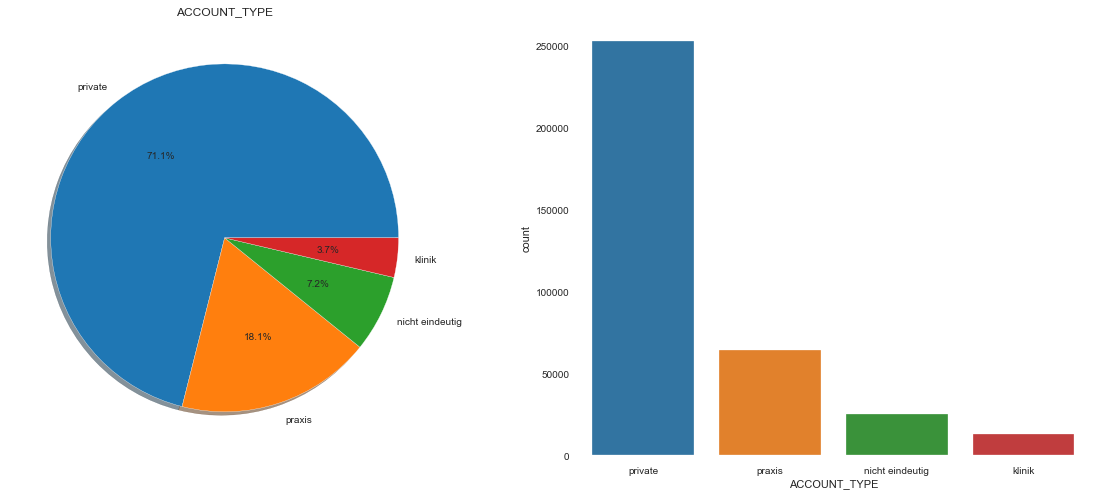

In [28]:
plot_pie_bar(df, 'ACCOUNT_TYPE')


## DELIVERY_STATUS


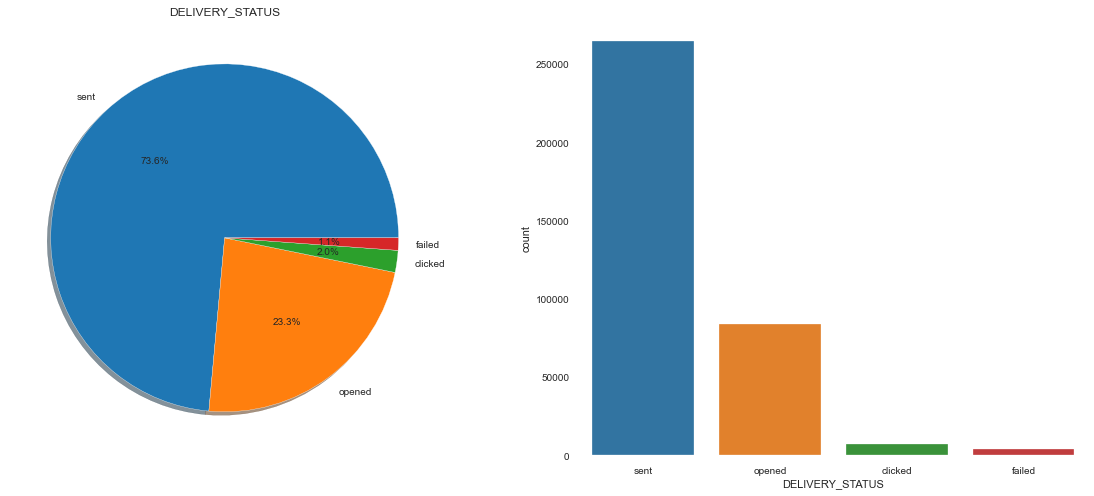

In [29]:
plot_pie_bar(df, 'DELIVERY_STATUS')


## PRODUKT


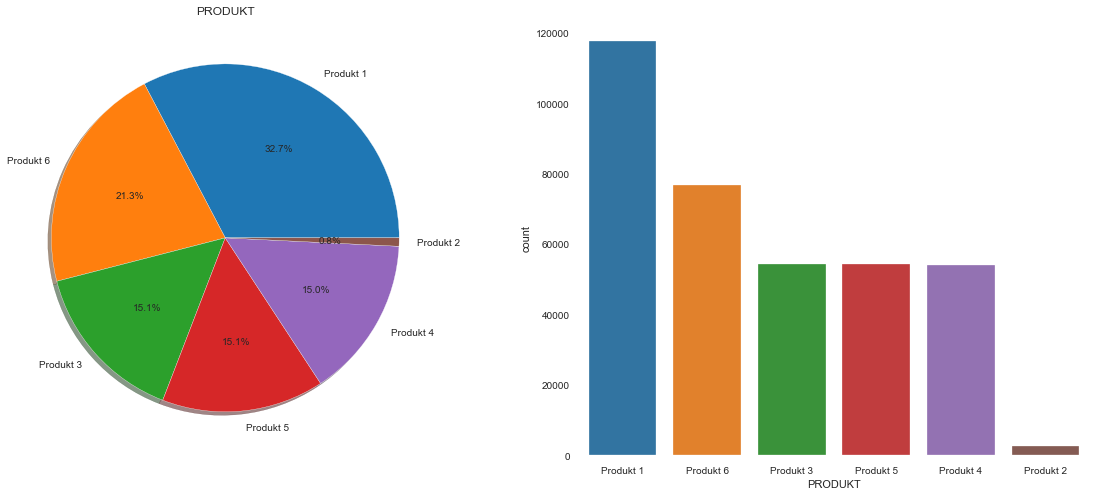

In [30]:
plot_pie_bar(df, 'PRODUKT')


## DATE_TIME

In [31]:
df['TIME'] = df['DATE_TIME'].dt.hour


In [32]:
df.head()

,HCP_ID,ACCOUNT_TYPE,EMAIL_ID,DELIVERY_STATUS,PRODUKT,DATUM_ID,DAY,DATE,DATE_TIME,TIME
0,HCP0001018487,private,ID51,sent,Produkt 1,20170307,07.03.2017 11:00,2017-03-07,2017-03-07 11:00:00,11
1,HCP0001006058,private,ID11,sent,Produkt 6,20180516,16.05.2018 14:00,2018-05-16,2018-05-16 14:00:00,14
2,HCP0001006058,private,ID26,opened,Produkt 4,20181212,12.12.2018 15:00,2018-12-12,2018-12-12 15:00:00,15
3,HCP0001006058,private,ID26,opened,Produkt 4,20181213,13.12.2018 17:00,2018-12-13,2018-12-13 17:00:00,17
4,HCP0001006058,private,ID16,opened,Produkt 5,20181113,13.11.2018 19:00,2018-11-13,2018-11-13 19:00:00,19


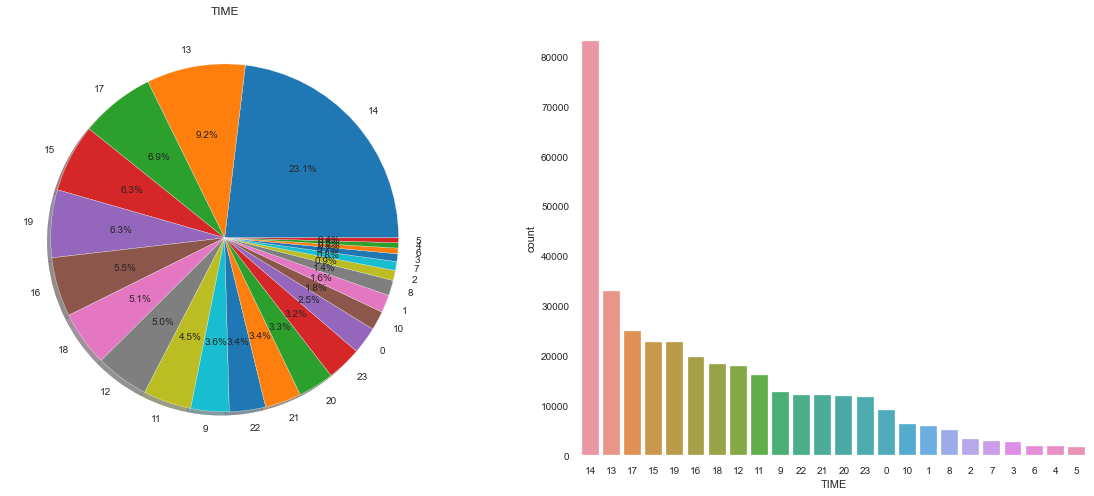

In [33]:
plot_pie_bar(df, 'TIME')


In [34]:
def get_time_group(time):
    if 0 <= time <= 7:
        return '0 - 7'
    elif 7 < time <= 12:
        return '7 - 12'
    elif 12 < time <= 13:
        return '12 - 13'
    elif 13 < time <= 18:
        return '13 - 18'
    else:
        return '18 - 0'
    

In [35]:
df['TIME_GROUP'] = df['TIME'].apply(get_time_group)


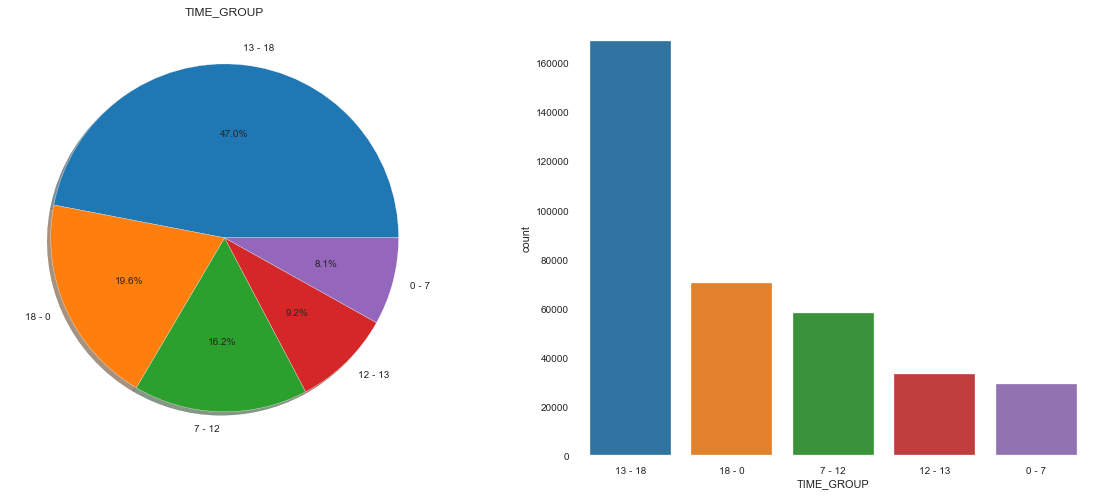

In [36]:
plot_pie_bar(df, 'TIME_GROUP')


In [37]:
df['YEAR'] = df['DATE_TIME'].dt.year
df['MONTH'] = df['DATE_TIME'].dt.month
df['DAY_OF_WEEK'] = df['DATE_TIME'].dt.dayofweek


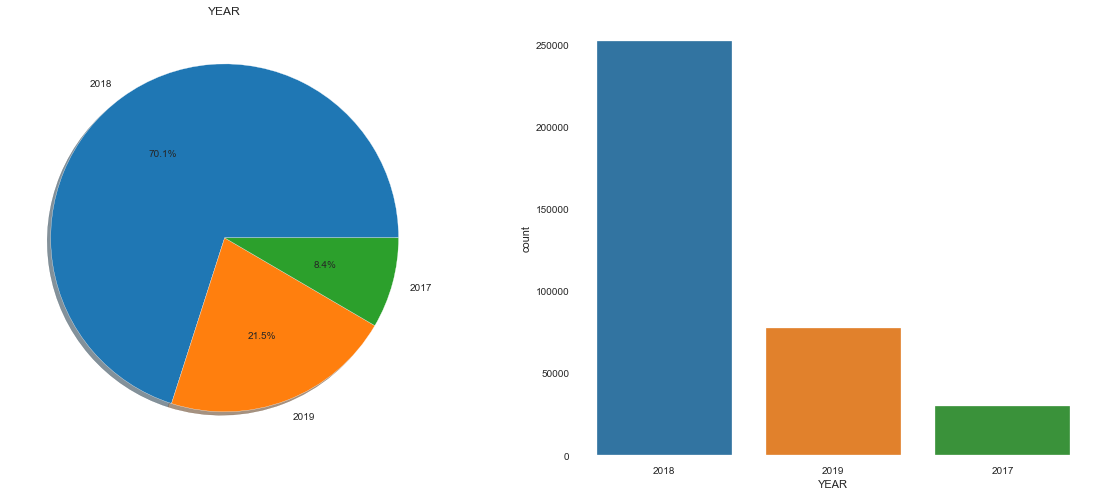

In [38]:
plot_pie_bar(df, 'YEAR')


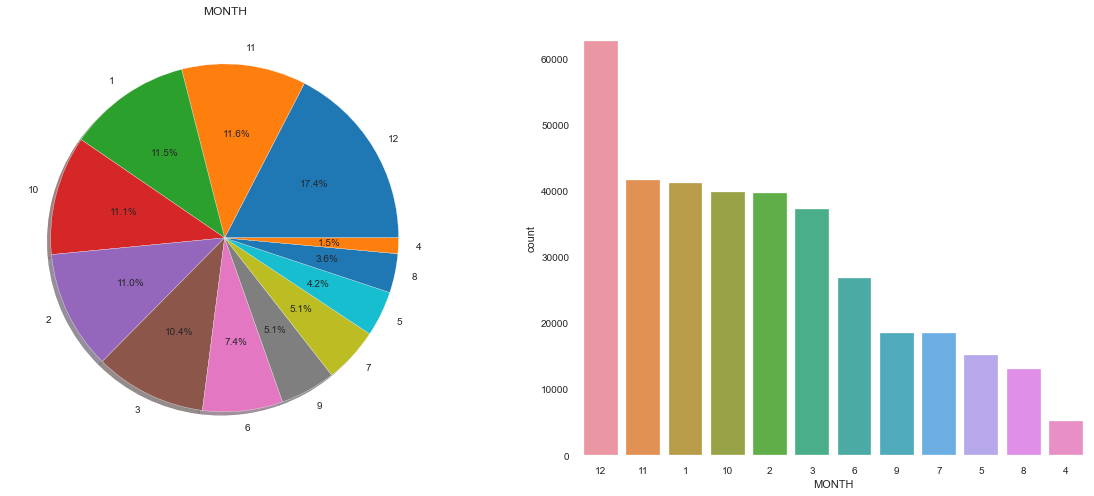

In [39]:
plot_pie_bar(df, 'MONTH')


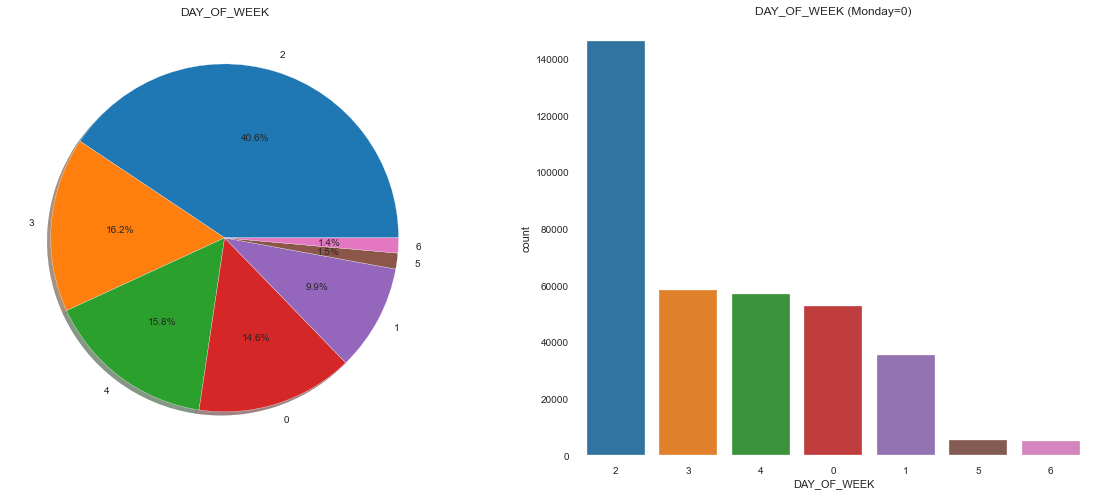

In [40]:
plot_pie_bar(df, 'DAY_OF_WEEK', title='DAY_OF_WEEK (Monday=0)')


## HCP_ID

- HCP0001018487

- Physician's ID (at least 1 record per person, multiple records for promotions and multiple emails)

- (diverse)


In [41]:
len(df['HCP_ID'].unique())


18841

In [42]:
group_email = df.groupby(['HCP_ID'])['EMAIL_ID'].apply(set).reset_index(name='set_EMAIL_ID')


In [43]:
group_email


,HCP_ID,set_EMAIL_ID
0,HCP0001001023,"{ID8, ID6, ID13, ID14, ID16, ID26, ID2, ID25, ..."
1,HCP0001001024,"{ID13, ID8, ID6, ID16, ID2, ID25, ID35, ID7, I..."
2,HCP0001001025,"{ID3, ID8}"
3,HCP0001001026,"{ID59, ID32, ID46, ID33, ID83, ID4}"
4,HCP0001001027,"{ID8, ID6, ID14, ID16, ID21, ID2, ID58, ID10, ..."
...,...,...
18836,HCP0001019859,{ID11}
18837,HCP0001019860,{ID7}
18838,HCP0001019861,{ID11}
18839,HCP0001019862,{ID63}


In [44]:
def get_nb_emails(row):
    return len(row['set_EMAIL_ID'])
    
group_email['NB_EMAILS'] = group_email.apply(get_nb_emails, axis=1)
    

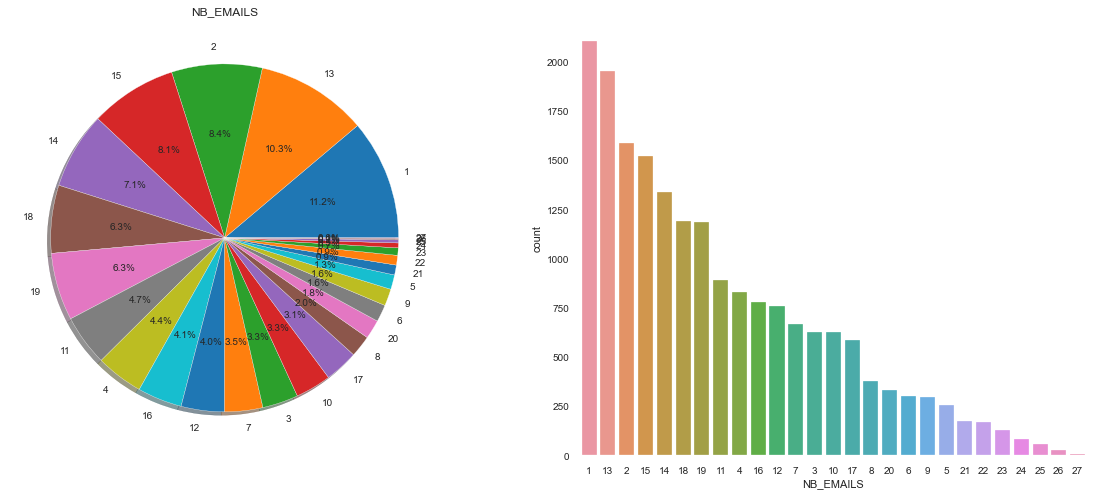

In [45]:
plot_pie_bar(group_email, 'NB_EMAILS')


## EMAIL_ID
    - ID1
    - Email ID that can be used to uniquely identify an email. The same emails have the same ID
    - ID1, ID2,....ID120



In [46]:
len(df['EMAIL_ID'].unique())


120

In [47]:
df.columns


Index(['HCP_ID', 'ACCOUNT_TYPE', 'EMAIL_ID', 'DELIVERY_STATUS', 'PRODUKT',
       'DATUM_ID', 'DAY', 'DATE', 'DATE_TIME', 'TIME', 'TIME_GROUP', 'YEAR',
       'MONTH', 'DAY_OF_WEEK'],
      dtype='object')

In [48]:
def get_nb_hcp_id(row):
    return len(row['set_HCP_ID'])


In [49]:
grouped_email = df.groupby(['EMAIL_ID'])['HCP_ID'].apply(set).reset_index(name='set_HCP_ID')

grouped_email['NB_HCP_ID'] = grouped_email.apply(get_nb_hcp_id, axis=1)

grouped_email.sort_values(by='NB_HCP_ID', ascending=False, inplace=True)


In [50]:
grouped_email


,EMAIL_ID,set_HCP_ID,NB_HCP_ID
12,ID11,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",15052
98,ID8,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",14608
76,ID6,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",12527
0,ID1,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",10018
28,ID16,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",9372
...,...,...,...
19,ID116,"{HCP0001015700, HCP0001015678, HCP0001013926, ...",5
22,ID119,{HCP0001004131},1
20,ID117,{HCP0001012150},1
21,ID118,{HCP0001004131},1


In [51]:
grouped_email['NB_HCP_ID'].unique()


array([15052, 14608, 12527, 10018,  9372,  7707,  7674,  7522,  6761,
        5028,  5027,  4743,  4592,  3783,  3684,  3391,  3360,  3353,
        3326,  3300,  2341,  2337,  2326,  2325,  2317,  2308,  2290,
        2163,  2051,  1988,  1979,  1967,  1950,  1922,  1851,  1616,
        1600,  1382,  1368,  1046,  1042,  1035,  1001,   988,   935,
         891,   890,   885,   867,   794,   769,   655,   650,   588,
         535,   528,   517,   515,   513,   503,   499,   498,   494,
         489,   465,   460,   459,   457,   456,   452,   436,   434,
         429,   427,   424,   421,   398,   335,   333,   302,   299,
         254,   248,   243,   201,   199,   189,   187,   173,   171,
         167,   155,   139,   122,   121,   115,   114,   113,   108,
          73,    68,    64,    63,    47,    43,    25,    22,    20,
           8,     5,     1])

In [52]:
grouped_email[grouped_email['EMAIL_ID'] == 'ID11']


,EMAIL_ID,set_HCP_ID,NB_HCP_ID
12,ID11,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",15052


In [53]:
grouped_email[grouped_email['EMAIL_ID'] == 'ID3']


,EMAIL_ID,set_HCP_ID,NB_HCP_ID
43,ID3,"{HCP0001011143, HCP0001012094, HCP0001005688, ...",1922


## How many time a product is mentioned in an email


In [54]:
df['PRODUKT'].unique()


array(['Produkt 1', 'Produkt 6', 'Produkt 4', 'Produkt 5', 'Produkt 3',
       'Produkt 2'], dtype=object)

In [55]:
def get_nb_emails(row):
    return len(row['set_EMAIL_ID'])

group_product = df.groupby(['PRODUKT'])['EMAIL_ID'].apply(set).reset_index(name='set_EMAIL_ID')

group_product['NB_EMAIL_ID'] = group_product.apply(get_nb_emails, axis=1)

group_product.sort_values(by='NB_EMAIL_ID', ascending=False, inplace=True)



In [56]:
group_product

,PRODUKT,set_EMAIL_ID,NB_EMAIL_ID
4,Produkt 5,"{ID16, ID30, ID72, ID111, ID29, ID90, ID20, ID...",37
0,Produkt 1,"{ID80, ID51, ID99, ID2, ID54, ID79, ID43, ID1,...",33
3,Produkt 4,"{ID45, ID39, ID101, ID26, ID38, ID109, ID5, ID...",26
2,Produkt 3,"{ID8, ID6, ID77, ID24, ID108, ID59, ID32, ID10...",15
5,Produkt 6,"{ID55, ID51, ID94, ID114, ID96, ID103, ID115, ...",12
1,Produkt 2,{ID3},1


In [57]:
def get_nb_hcp(row):
    return len(row['set_HCP_ID'])

group_product = df.groupby(['PRODUKT'])['HCP_ID'].apply(set).reset_index(name='set_HCP_ID')

group_product['NB_HCP_ID'] = group_product.apply(get_nb_hcp, axis=1)

group_product.sort_values(by='NB_HCP_ID', ascending=False, inplace=True)


In [58]:
group_product


,PRODUKT,set_HCP_ID,NB_HCP_ID
2,Produkt 3,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",15512
0,Produkt 1,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",15211
4,Produkt 5,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",13203
5,Produkt 6,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",13124
3,Produkt 4,"{HCP0001013866, HCP0001003929, HCP0001012386, ...",12569
1,Produkt 2,"{HCP0001011143, HCP0001012094, HCP0001005688, ...",1922


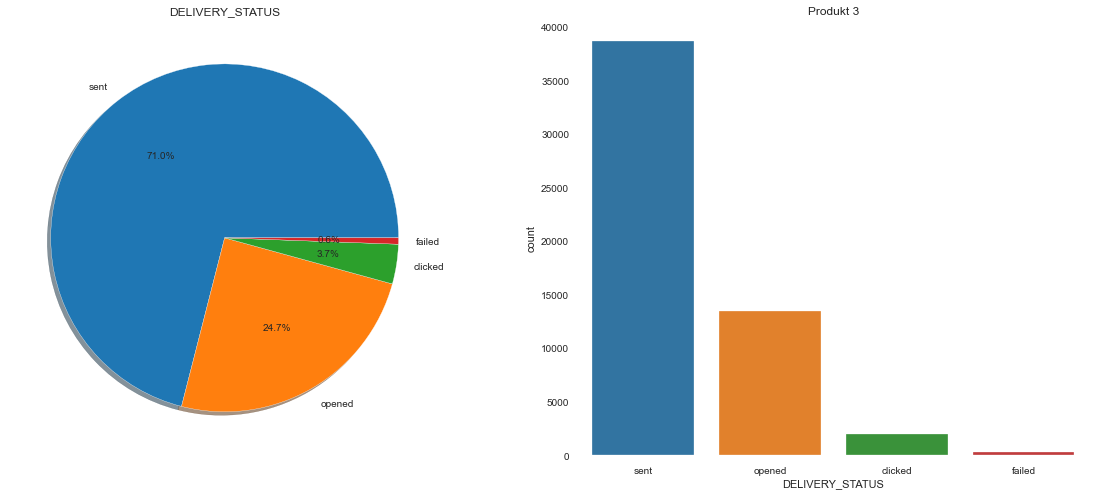

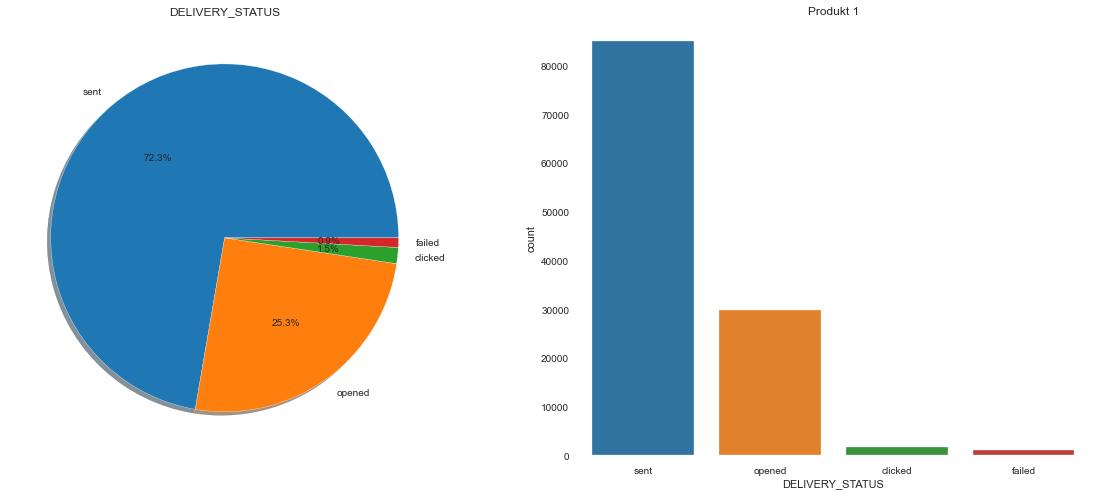

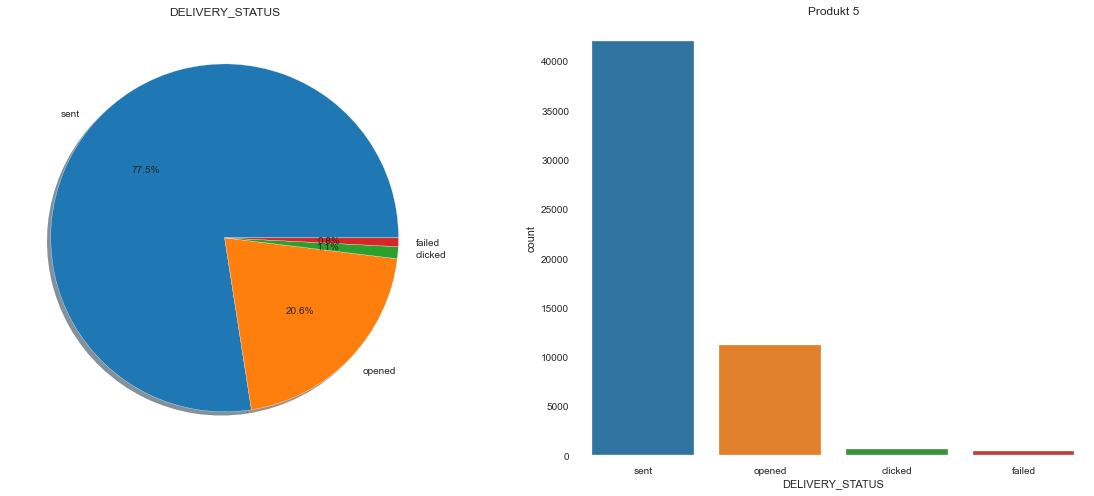

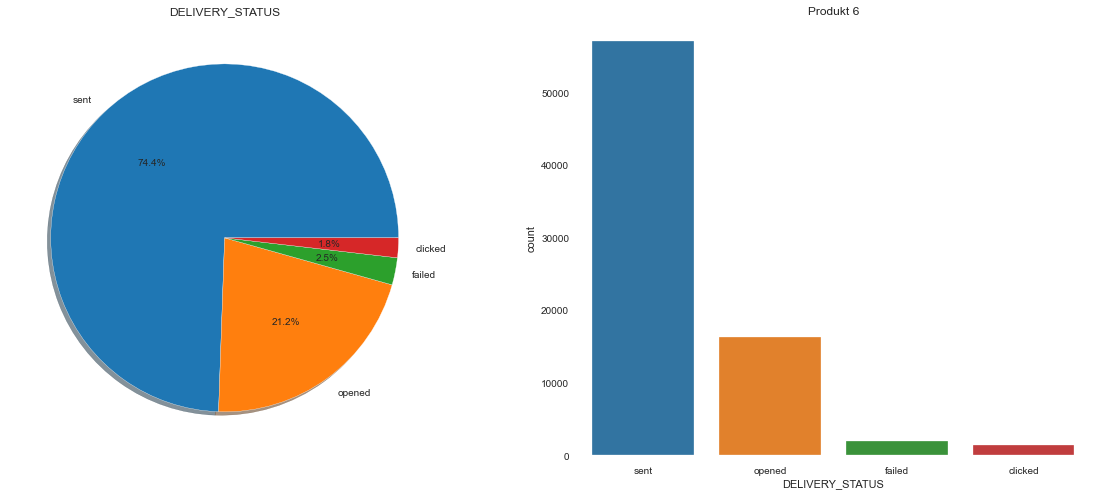

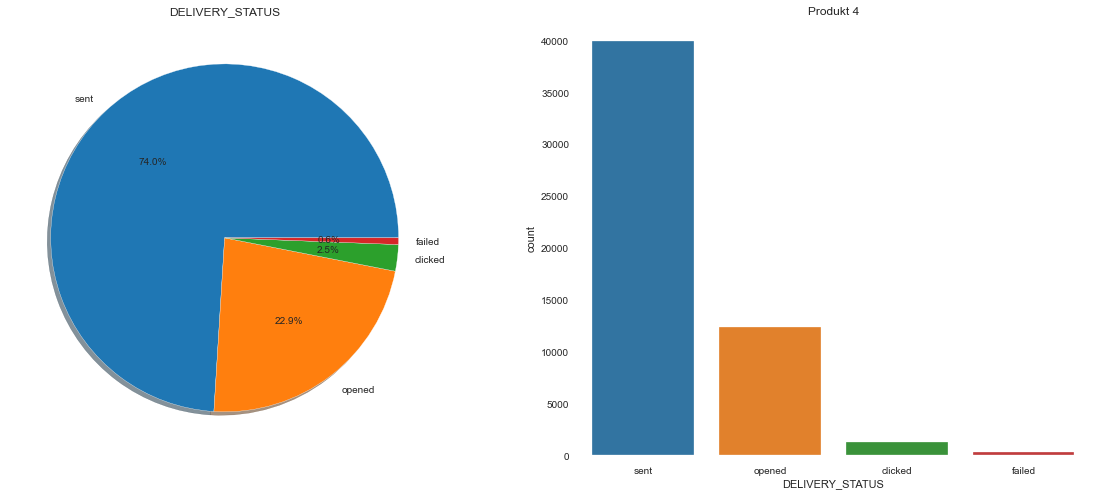

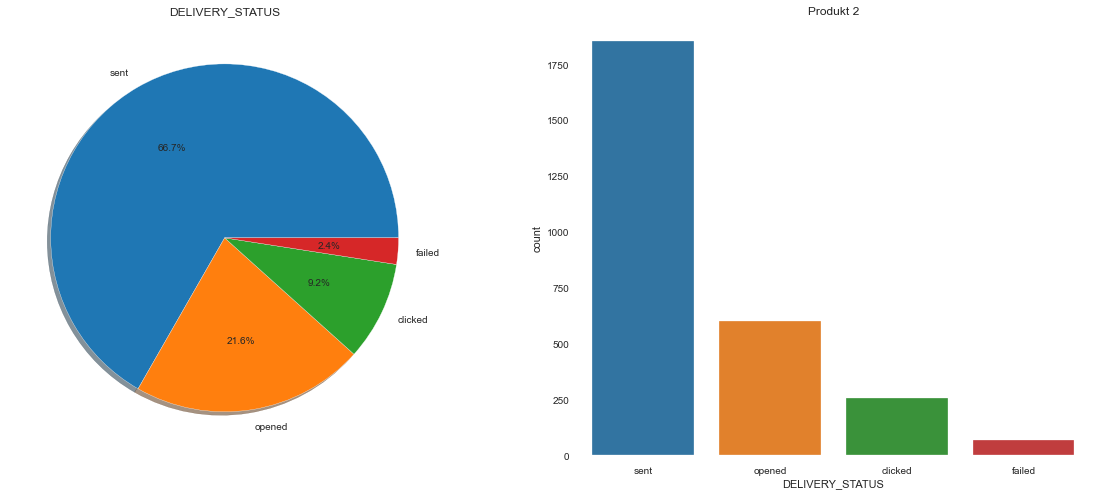

In [59]:
for product in ['Produkt 3', 'Produkt 1', 'Produkt 5', 'Produkt 6', 'Produkt 4', 'Produkt 2']:
    plot_pie_bar(df[df['PRODUKT']==product], 'DELIVERY_STATUS', product)


In [60]:
df.columns


Index(['HCP_ID', 'ACCOUNT_TYPE', 'EMAIL_ID', 'DELIVERY_STATUS', 'PRODUKT',
       'DATUM_ID', 'DAY', 'DATE', 'DATE_TIME', 'TIME', 'TIME_GROUP', 'YEAR',
       'MONTH', 'DAY_OF_WEEK'],
      dtype='object')

In [61]:
def get_nb_dates(row):
    return len(row['set_DATE_TIME'])

group_product = df.groupby(['PRODUKT'])['DATE_TIME'].apply(set).reset_index(name='set_DATE_TIME')

group_product['NB_DATE_TIME'] = group_product.apply(get_nb_dates, axis=1)

group_product.sort_values(by='NB_DATE_TIME', ascending=False, inplace=True)


In [62]:
group_product


,PRODUKT,set_DATE_TIME,NB_DATE_TIME
0,Produkt 1,"{2018-12-09 16:00:00, 2018-08-04 08:00:00, 201...",3621
5,Produkt 6,"{2018-02-27 11:00:00, 2018-04-19 07:00:00, 201...",2972
3,Produkt 4,"{2018-11-12 04:00:00, 2019-03-13 09:00:00, 201...",2101
4,Produkt 5,"{2017-10-20 13:00:00, 2017-09-24 19:00:00, 201...",2070
2,Produkt 3,"{2018-12-09 16:00:00, 2017-09-24 19:00:00, 201...",1926
1,Produkt 2,"{2019-02-08 08:00:00, 2018-11-30 12:00:00, 201...",233


In [63]:
df[df['PRODUKT'] == 'Produkt 2']['DATE_TIME'].min()


Timestamp('2018-11-30 12:00:00')

In [64]:
df[df['PRODUKT'] == 'Produkt 2']['DATE_TIME'].max()


Timestamp('2019-03-22 19:00:00')

In [65]:
df[df['PRODUKT'] == 'Produkt 1']['DATE_TIME'].min()


Timestamp('2017-03-04 09:00:00')

In [66]:
df[df['PRODUKT'] == 'Produkt 1']['DATE_TIME'].max()


Timestamp('2019-03-27 20:00:00')

In [67]:
def get_nb_types(row):
    return len(row['set_ACCOUNT_TYPE'])

group_product = df.groupby(['PRODUKT'])['ACCOUNT_TYPE'].apply(set).reset_index(name='set_ACCOUNT_TYPE')

group_product['NB_ACCOUNT_TYPE'] = group_product.apply(get_nb_types, axis=1)

group_product.sort_values(by='NB_ACCOUNT_TYPE', ascending=False, inplace=True)


In [68]:
group_product


,PRODUKT,set_ACCOUNT_TYPE,NB_ACCOUNT_TYPE
0,Produkt 1,"{nan, private, klinik, praxis, nicht eindeutig}",5
1,Produkt 2,"{nan, private, klinik, praxis, nicht eindeutig}",5
2,Produkt 3,"{nan, private, klinik, praxis, nicht eindeutig}",5
3,Produkt 4,"{nan, private, klinik, praxis, nicht eindeutig}",5
4,Produkt 5,"{nan, private, klinik, praxis, nicht eindeutig}",5
5,Produkt 6,"{nan, private, klinik, praxis, nicht eindeutig}",5


In [69]:
df[df['ACCOUNT_TYPE'].isnull()]

,HCP_ID,ACCOUNT_TYPE,EMAIL_ID,DELIVERY_STATUS,PRODUKT,DATUM_ID,DAY,DATE,DATE_TIME,TIME,TIME_GROUP,YEAR,MONTH,DAY_OF_WEEK
355974,HCP0001001149,NaN,ID11,opened,Produkt 6,20180319,19.03.2018 12:00,2018-03-19,2018-03-19 12:00:00,12,7 - 12,2018,3,0
355975,HCP0001001149,NaN,ID11,sent,Produkt 6,20180319,19.03.2018 12:00,2018-03-19,2018-03-19 12:00:00,12,7 - 12,2018,3,0
355976,HCP0001001149,NaN,ID11,clicked,Produkt 6,20180319,19.03.2018 12:00,2018-03-19,2018-03-19 12:00:00,12,7 - 12,2018,3,0
355977,HCP0001001231,NaN,ID11,sent,Produkt 1,20180319,19.03.2018 11:00,2018-03-19,2018-03-19 11:00:00,11,7 - 12,2018,3,0
355978,HCP0001001231,NaN,ID11,sent,Produkt 6,20180319,19.03.2018 12:00,2018-03-19,2018-03-19 12:00:00,12,7 - 12,2018,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359772,HCP0001019859,NaN,ID11,sent,Produkt 1,20180319,19.03.2018 11:00,2018-03-19,2018-03-19 11:00:00,11,7 - 12,2018,3,0
359773,HCP0001019860,NaN,ID7,failed,Produkt 5,20190204,04.02.2019 10:00,2019-02-04,2019-02-04 10:00:00,10,7 - 12,2019,2,0
359774,HCP0001019861,NaN,ID11,sent,Produkt 1,20180319,19.03.2018 11:00,2018-03-19,2018-03-19 11:00:00,11,7 - 12,2018,3,0
359775,HCP0001019862,NaN,ID63,failed,Produkt 6,20170329,29.03.2017 14:00,2017-03-29,2017-03-29 14:00:00,14,13 - 18,2017,3,2


In [70]:
df['ACCOUNT_TYPE'].unique()


array(['private', 'praxis', 'nicht eindeutig', 'klinik', nan],
      dtype=object)

In [71]:
def get_nb_types(row):
    return len(row['set_ACCOUNT_TYPE'])

group_hcp = df.groupby(['HCP_ID'])['ACCOUNT_TYPE'].apply(set).reset_index(name='set_ACCOUNT_TYPE')

group_hcp['NB_ACCOUNT_TYPE'] = group_hcp.apply(get_nb_types, axis=1)

group_hcp.sort_values(by='NB_ACCOUNT_TYPE', ascending=False, inplace=True)


In [72]:
group_hcp


,HCP_ID,set_ACCOUNT_TYPE,NB_ACCOUNT_TYPE
0,HCP0001001023,{private},1
12549,HCP0001013572,{praxis},1
12565,HCP0001013588,{private},1
12564,HCP0001013587,{private},1
12563,HCP0001013586,{private},1
...,...,...,...
6280,HCP0001007303,{private},1
6279,HCP0001007302,{private},1
6278,HCP0001007301,{private},1
6277,HCP0001007300,{praxis},1


# Provide recommendations for optimizing the email communication approach including recommendations on how to measure the success of subsequent email campaigns.
